<a href="https://colab.research.google.com/github/highstreeto/akt-image-class-fh-uni/blob/master/ImageClass_FH_Uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from google_images_download import google_images_download
import random

## Download Images

The download is documentetd here.

The images are loaded via GitHub so the same images are used.

In [0]:
response = google_images_download.googleimagesdownload()
fh_images = response.download({"keywords": "fh gebaeude oesterreich", "output_directory": "drive/My Drive/AKT"})


Item no.: 1 --> Item name = fh gebaeude oesterreich
Evaluating...
Starting Download...
Completed Image ====> 1.1257860847.jpg
Completed Image ====> 2.fhooe-wels-gebauede2.JPG
Completed Image ====> 3.fhtw-8111cw.grabner.jpg
Completed Image ====> 4.1571727052.4881-fachhochschule-steyr-neues-gebaeude-eroeffnet.jpg
Completed Image ====> 5.wifi_wien_06_coe.5690281.jpg
Completed Image ====> 6.img_20161229_090126.jpg
Completed Image ====> 7.fh-gebaeude.jpg
Completed Image ====> 8.fh-campus-wien20091125111341.jpg
Completed Image ====> 9.fhooe-hagenberg-softwarepark.jpg
Completed Image ====> 10.nmpb_fhstp_blick08.jpg
Completed Image ====> 11.1708_fhtw_web-110.jpg
Completed Image ====> 12.9c6e2cedcadb6850_org.jpg
Completed Image ====> 13.fh-technikum-wien-1280.jpg
Completed Image ====> 14.Geb%C3%A4ude-Umgebungsplan_FHWien-der-WKW.png
Completed Image ====> 15.2280528_artikeldetail-maxi_1tH8cS_WDlrfa.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAIL

In [0]:
uni_images = response.download({"keywords": "universitaet gebaeude oesterreich", "output_directory": "drive/My Drive/AKT"})


Item no.: 1 --> Item name = universitaet gebaeude oesterreich
Evaluating...
Starting Download...
Completed Image ====> 1.1200px-Wien_-_Universit%C3%A4t_%283%29.JPG
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
Completed Image ====> 2.UniWien.jpg
Completed Image ====> 3.Technische_Universit%C3%A4t_Wien_mainbuilding_mainentrance_northview_.jpg
Completed Image ====> 4.Universit%C3%A4t_Geb%C3%A4ude.jpg
Completed Image ====> 5.gebaude-der-bibliothek-der-tu-wien-universitat-in-wien-osterreich-mkhmjx.jpg
Completed Image ====> 6.technische-universitat-tu-wien-gebaude-in-wien-osterreich-mkhmjt.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
Completed Image ====> 7.Fakult%C3%A4t_

## Import images from GitHub


In [1]:
!git clone -l -s https://github.com/highstreeto/akt-image-class-fh-uni.git data
%cd data
!ls

Cloning into 'data'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 193 (delta 2), reused 187 (delta 1), pack-reused 0
Receiving objects: 100% (193/193), 109.50 MiB | 41.73 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/data
ImageClass_FH_Uni.ipynb  images  README.md


# Define traing data

In [0]:
def skip_broken_images(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except GeneratorExit:
            break
        except:
            pass

def plotImages(images_arr, size):
    fig, axes = plt.subplots(1, size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
  
def class_idx_to_name(class_idx):
  if (class_idx == 0):
    return "FH"
  else:
    return "Uni"

In [0]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
	rescale=1./255,
	rotation_range=25,
	width_shift_range=0.1,
	height_shift_range=0.1,
	brightness_range=(0.9, 1.1),
	horizontal_flip=True,
	vertical_flip=False
)

In [0]:
train_dir = "./data/images"
IMG_HEIGHT, IMG_WIDTH = 224, 224
batch_size = 32

train_data_gen = train_image_generator.flow_from_directory(
	batch_size=batch_size,
	directory=train_dir,
	shuffle=True,
	target_size=(IMG_HEIGHT, IMG_WIDTH)
)			

print(train_data_gen.class_indices)


Found 184 images belonging to 2 classes.
{'fh gebaeude oesterreich': 0, 'universitaet gebaeude oesterreich': 1}


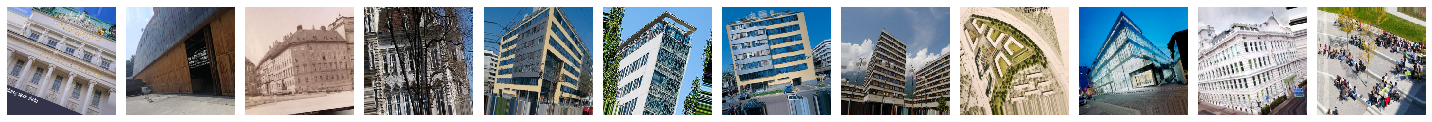

In [0]:
sample_training_images, _ = next(skip_broken_images(train_data_gen))
plotImages(sample_training_images, 12)

# Define network

In [0]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(
	include_top=False,
	pooling='max',
	input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
	weights='imagenet')	

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94674944/94668760 [==============================] - 3s 0us/step


In [0]:
model = tf.keras.Sequential([
	base_model,
	tf.keras.layers.Dense(512, 'relu'),
	tf.keras.layers.Dense(256, 'relu'),
	tf.keras.layers.Dense(train_data_gen.num_classes, 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 24,745,730
Trainable params: 24,700,290
Non-trainable params: 45,440
_________________________________________________________________


# Define callbacks

In [0]:
snapshot_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="./snapshots",
    verbose=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
		monitor="loss",
		min_delta=0.001,
		patience=2
)

# Train only last layer

In [0]:
for layer in base_model.layers:
	layer.trainable = False
  
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['categorical_accuracy'])

history = model.fit_generator(
	skip_broken_images(train_data_gen),
	steps_per_epoch=3,
	epochs=100,
	callbacks=[early_stopping_callback]
)

Epoch 1/100
3/3 [==============================] - 29s 10s/step - loss: 19.1929 - categorical_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 23s 8s/step - loss: 1.9043 - categorical_accuracy: 0.4886
Epoch 3/100
3/3 [==============================] - 19s 6s/step - loss: 1.0210 - categorical_accuracy: 0.6042
Epoch 4/100
3/3 [==============================] - 19s 6s/step - loss: 1.0512 - categorical_accuracy: 0.6023
Epoch 5/100
3/3 [==============================] - 20s 7s/step - loss: 1.4369 - categorical_accuracy: 0.6146


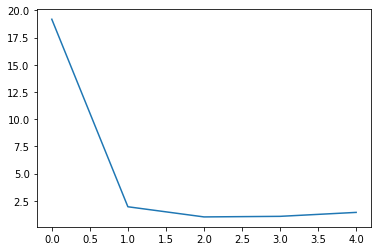

In [0]:
plt.plot(history.history['loss'])

# Train full network

In [0]:
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])    

history = model.fit_generator(
    skip_broken_images(train_data_gen),
    steps_per_epoch=3,
    epochs=10,
    callbacks=[early_stopping_callback]
)

Epoch 1/10
3/3 [==============================] - 76s 25s/step - loss: 4.7167 - categorical_accuracy: 0.6023
Epoch 2/10
3/3 [==============================] - 61s 20s/step - loss: 2.8098 - categorical_accuracy: 0.4375
Epoch 3/10
3/3 [==============================] - 56s 19s/step - loss: 0.7611 - categorical_accuracy: 0.5568
Epoch 4/10
3/3 [==============================] - 60s 20s/step - loss: 0.7223 - categorical_accuracy: 0.5833
Epoch 5/10
3/3 [==============================] - 56s 19s/step - loss: 0.7233 - categorical_accuracy: 0.5909
Epoch 6/10
3/3 [==============================] - 60s 20s/step - loss: 0.7041 - categorical_accuracy: 0.6458
Epoch 7/10
3/3 [==============================] - 55s 18s/step - loss: 0.7694 - categorical_accuracy: 0.5000
Epoch 8/10
3/3 [==============================] - 60s 20s/step - loss: 0.6403 - categorical_accuracy: 0.6667
Epoch 9/10
3/3 [==============================] - 55s 18s/step - loss: 0.5330 - categorical_accuracy: 0.7500
Epoch 10/10
3/3 [==

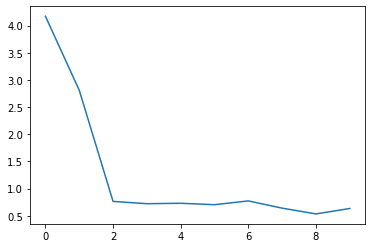

In [0]:
plt.plot(history.history['loss'])

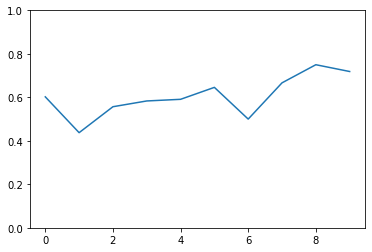

In [0]:
plt.plot(history.history['categorical_accuracy'], scaley=False)

# Test with one batch

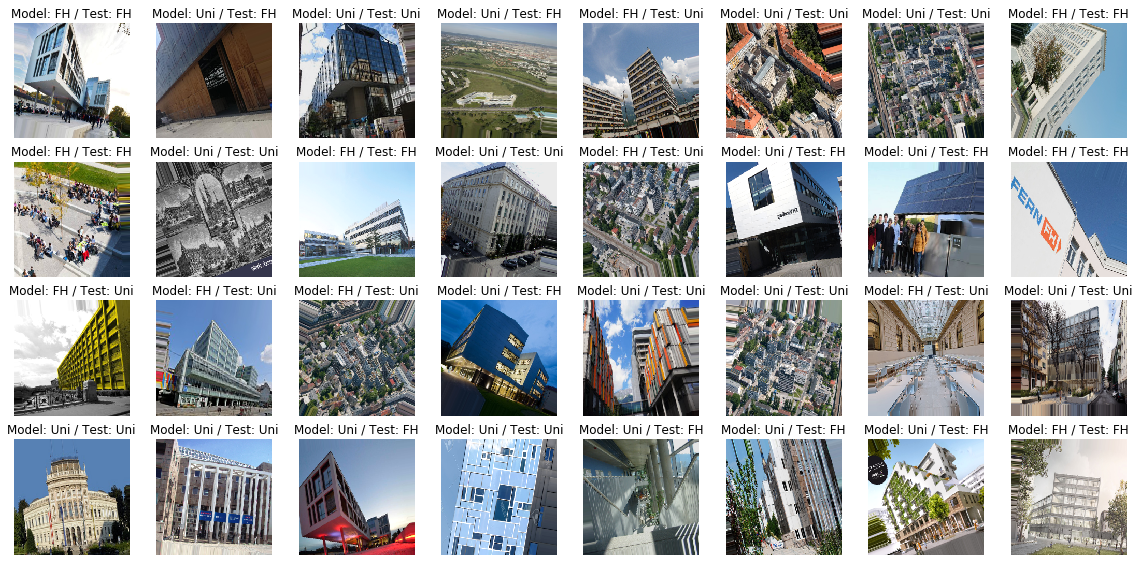

In [0]:
plt.figure(figsize=(20,20))
batch = next(skip_broken_images(train_data_gen))
for i, img in enumerate(batch[0]):
  # ResNet takes natches of images to classify so create new batch array with one image
  model_input = np.zeros((1, 224, 224, 3), dtype=float)
  model_input[0] = img

  pred = np.argmax(model.predict(model_input)[0])
  test = np.argmax(batch[1][i])

  plt.subplot(8,8, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title("Model: %s / Test: %s" % (class_idx_to_name(pred), class_idx_to_name(test)))